In [1]:
load dm.pmf
load dm.core
//from dm.pmf import toPMF, toL, normalise
from dm.core import PP, *, /

('load dm.pmf\nload dm.core\n//from dm.pmf import toPMF, toL, normalise\nfrom dm.core import PP, *, /', False, True, {}, True)

<br>

#### Bayes Refresher

from PROP 3
$$
\begin{align}
\mathbf{P}\left(B \cap A\right) = \mathbf{P}\left(B\mathbin{\vert}A\right)\cdot \mathbf{P}\left(A\right)\\
\end{align}
$$

and obviously
$$\mathbf{P}(A \cap B) = \mathbf{P}(B \cap A)$$

so
$$
\begin{align}
\mathbf{P}( A\mathbin{\vert}B) \cdot \mathbf{P}(B)=\mathbf{P}(B\mathbin{\vert}A)\cdot \mathbf{P}(A)
\end{align}
$$

aka
$$
\begin{align}
\mathbf{P}( hypothesis\mathbin{\vert}data) \cdot \mathbf{P}(data)=\mathbf{P}(data\mathbin{\vert}hypothesis)\cdot \mathbf{P}(hypothesis)
\end{align}
$$

Comtemporaneous (look it up) version, i.e. after some data is known
$$
\begin{align}
posterior =likelihood\cdot prior \cdot constant
\end{align}
$$

<br>

#### 1.6 The M&M Problem

M&M’s are small candy-coated chocolates that come in a variety of colors.
Mars, Inc., which makes M&M’s, changes the mixture of colors from time
to time.

In 1995, they introduced blue M&M’s. Before then, the color mix in a bag
of plain M&M’s was 30% Brown, 20% Yellow, 20% Red, 10% Green, 10%
Orange, 10% Tan. Afterward it was 24% Blue , 20% Green, 16% Orange,
14% Yellow, 13% Red, 13% Brown.

Suppose a friend of mine has two bags of M&M’s, and he tells me that one
is from 1994 and one from 1996. He won’t tell me which is which, but he
gives me one M&M from each bag. One is yellow and one is green. What is
the probability that the yellow one came from the 1994 bag?

In [2]:
//%%module m_n_ms inherit scratch

bag1994: {Brown:30, Yellow:20, Red:20, Green:10, Orange:10, Tan:10} toPMF PP
bag1996: {Brown:13, Yellow:14, Red:13, Green:20, Orange:16, Blue:24} toPMF PP.

('//%%module m_n_ms inherit scratch\n\nbag1994: {Brown:30, Yellow:20, Red:20, Green:10, Orange:10, Tan:10} toPMF PP\nbag1996: {Brown:13, Yellow:14, Red:13, Green:20, Orange:16, Blue:24} toPMF PP.', False, True, {}, True)


struct: scratch.42 {Brown:litint, Yellow:litint, Red:litint, Green:litint, Orange:litint, Blue:litint}


hypA -> yellow is from 1994, green is from 1996\
hypB -> green is from 1994, yellow is from 1996

In [3]:
//%%module m_n_ms

prior: {hypA:0.5, hypB:0.5} toPMF PP

likelihood: {
    hypA:bag1994.Yellow * bag1996.Green, 
    hypB:bag1994.Green * bag1996.Yellow
} toL PP

post: prior * likelihood normalise PP

20/27

('//%%module m_n_ms\n\nprior: {hypA:0.5, hypB:0.5} toPMF PP\n\nlikelihood: {\n    hypA:bag1994.Yellow * bag1996.Green, \n    hypB:bag1994.Green * bag1996.Yellow\n} toL PP\n\npost: prior * likelihood normalise PP\n\n20/27', False, True, {}, True)

SentenceError: unknown name - bag1994.Yellow


<br>

#### 1.7 The Monty Hall problem

Monty Hall was the original host of the game show Let’s Make a Deal. The
Monty Hall problem is based on one of the regular games on the show. If
you are on the show, here’s what happens:

• Monty shows you three closed doors and tells you that there is a prize
behind each door: one prize is a car, the other two are less valuable
prizes like peanut butter and fake finger nails. The prizes are arranged
at random.

• The object of the game is to guess which door has the car. If you guess
right, you get to keep the car.

• You pick a door, which we will call Door A. We’ll call the other doors
B and C.

• Before opening the door you chose, Monty increases the suspense by
opening either Door B or C, whichever does not have the car. (If the
car is actually behind Door A, Monty can safely open B or C, so he
chooses one at random.)

• Then Monty offers you the option to stick with your original choice or
switch to the one remaining unopened door.

The question is, should you “stick” or “switch” or does it make no difference?

**Minor reframe**

Let A be the door we initially choose at random \
Let B be the door Monty selects to show us to be without a car \
Let C be the other door we can choose after the fact

In [32]:
%%module monty_hall inherit scratch

prior: {A:1, B:1, C:1} toPmf
likelihood: {   // i.e. likelihood of monty opening B given that the car is behind each, i.e. p(data|hyp)
    A: 0.5,     // prob of opening B if behind A - he can choose at random so 50:50
    B: 0,       // prob of opening B if behind B - Monty can't open B else he'd reveal the car, so cannot open B => 0%
    C: 1,       // prob of opening B if behind C - Monty can't open C else he'd reveal the car, so must open B => 100%
} toL
posterior: prior * likelihood normalise

PMF(A=0.333, B=0.000, C=0.667)


#### 1.8 Discussion
If the Monty Hall problem is your idea of fun, I have collected a num- ber of similar problems in an article called “All your Bayes are belong to us,” which you can read at http://allendowney.blogspot.com/2011/10/ all-your-bayes-are-belong-to-us.html.

<br>

#### 2.8 Exercises

**Exercise 2.1.** In Section 2.3 I said that the solution to the cookie problem generalizes to the case where we draw multiple cookies with replacement.

But in the more likely scenario where we eat the cookies we draw, the likelihood of each draw depends on the previous draws.

Modify the solution in this chapter to handle selection without replacement. Hint: add instance variables to Cookie to represent the hypothetical state of the bowls, and modify Likelihood accordingly. You might want to define a Bowl object.

In [33]:
@coppertop
def withAttr(s, name, value):
    s = adhoc(s)
    s[name] = value
    return s

In [34]:
%%python

@coppertop
def jarLikelihood(jarsStates, flavour):
    return jarsStates >> each >> (lambda j: (j >> at(_,'tag'), j[flavour])) >> to(_,L)

@coppertop
def jarUpdate(jarsStateAndPrior, flavour):
    jarsState, prior = jarsStateAndPrior
    posterior = prior >> pmfMul >> jarLikelihood(jarsState, flavour) >> normalise
    jarsState = jarsState >> each >> (lambda s: s >> withAttr(_, flavour, s[flavour] - 1))
    f'{flavour}: {posterior >> formatPmf} ({jarsState})' >> PP
    return (jarsState, posterior)

modelState = [adhoc(V=30, C=10, tag='J1'), adhoc(V=20, C=20, tag='J2')]
data = ['V', 'C']

(modelState, PMF(J1=0.5, J2=0.5)) >> inject(data, _, _) >> jarUpdate;

V: PMF(J1=0.600, J2=0.400) ([adhoc(V=29, C=10, tag='J1'), adhoc(V=19, C=20, tag='J2')])
C: PMF(J1=0.429, J2=0.571) ([adhoc(V=29, C=9, tag='J1'), adhoc(V=19, C=19, tag='J2')])


In [ ]:
%%module cookies

jarLikelihood: {[jarsStates, flavour] jarsStates collect {(j.tag, j[flavour])} toL}

jarUpdate: {[jarsStateAndPrior, flavour]                           // we could unpack instead like this - jarUpdate: {[(jarsState, prior), flavour] 
    (jarsState, prior): jarsStateAndPrior
    posterior: prior * jarLikelihood(jarsState, flavour) normalise
    jarsState: jarsState collect [[js] js[flavour]: js[flavour] - 1]
    flavour join ": " join (posterior formatPmf) join " (" join jarsState join ")" PP 
    (jarState, posterior)
}

modelState: ( {V:30, C:10, tag:"J1"}, {V:20, C:20, tag:"J2"} )
data: ("V", "C")

(modelState, {J1:0.5, J2:0.5} toPmf) inject (data,,) jarUpdate.
data inject: (modelState, {J1:0.5, J2:0.5} toPmf) into: jarUpdate.



<br>

#### 3.1 The dice problem

Suppose I have a box of dice that contains a 4-sided die, a 6-sided die, an 8-sided die, a 12-sided die, and a 20-sided die. If you have ever played Dungeons & Dragons, you know what I am talking about.

Suppose I select a die from the box at random, roll it, and get a 6. What is the probability that I rolled each die?

In [35]:
# normalise >> sig

In [36]:
@coppertop
def diceLikelihood(rvs, val):
    tagLikePairs = rvs >> each >> (lambda rv: (rv.tag, rv._get(val, 0.0)))
    return L(tagLikePairs)

d4 = (sequence(1, 4) >> uniform)(tag='d4')
d6 = (sequence(1, 6) >> uniform)(tag='d6')
d8 = (sequence(1, 8) >> uniform)(tag='d8')
d12 = (sequence(1, 12) >> uniform)(tag='d12')
d20 = (sequence(1, 20) >> uniform)(tag='d20')

modelState = [d4, d6, d8, d12, d20]
prior = PMF(d4=1, d6=1, d8=1, d12=1, d20=1)
prior >> PP(_,formatPmf) >> pmfMul >> (diceLikelihood(modelState, 6) >> PP(_,formatL)) >> normalise >> PP(_,formatPmf);

PMF(d4=0.200, d6=0.200, d8=0.200, d12=0.200, d20=0.200)
L(d4=0.000, d6=0.167, d8=0.125, d12=0.083, d20=0.050)
PMF(d4=0.000, d6=0.392, d8=0.294, d12=0.196, d20=0.118)


In [37]:
@coppertop
def diceUpdate(prior, modelState, data):
    posterior = prior >> pmfMul >> diceLikelihood(modelState, data) >> normalise
    return posterior >> PP(_, formatPmf)

[6, 6, 8, 7, 7, 5, 4] >> inject(_, prior, _) >> diceUpdate(_, modelState, _);

PMF(d4=0.000, d6=0.392, d8=0.294, d12=0.196, d20=0.118)
PMF(d4=0.000, d6=0.526, d8=0.296, d12=0.131, d20=0.047)
PMF(d4=0.000, d6=0.000, d8=0.735, d12=0.218, d20=0.047)
PMF(d4=0.000, d6=0.000, d8=0.818, d12=0.161, d20=0.021)
PMF(d4=0.000, d6=0.000, d8=0.876, d12=0.115, d20=0.009)
PMF(d4=0.000, d6=0.000, d8=0.916, d12=0.080, d20=0.004)
PMF(d4=0.000, d6=0.000, d8=0.943, d12=0.055, d20=0.002)


In [38]:
@coppertop
def toSteps(s:PMF+adhoc, **kwargs) -> pytuple:
    return asSteps(s >> keys, s >> values, **kwargs)

def asSteps(xs, ys, align='center', width=None):
    #xMin, xMax = min(xs), max(xs)
    if width is None:
        width = np.diff(xs).min()
    points = []
    lastx = np.nan
    lasty = np.nan
    for x, y in zip(xs, ys):
        if (x - lastx) > 1e-5:
            points.append((lastx, 0))
            points.append((x, 0))
        if not np.isnan(lasty):
            points.append((x, lasty))
        points.append((x, y))
        points.append((x + width, y))
        lastx = x + width
        lasty = y
    points.append((lastx, lasty))
    pxs, pys = zip(*points)
    if align == 'center':
        pxs = np.array(pxs) - width / 2.0
    elif align == 'right':
        pxs = np.array(pxs) - width
    return pxs, np.array(pys)

<br>

#### 3.2 The locomotive problem

A railroad numbers its locomotives in order 1..N. One day you see a locomotive with the number 60. Estimate how many locomotives the railroad has.

**Notes**

The railroad has more than 1000 locomotives \
If the railroad has N locomotives then the chance of seeing a particular locomotive is uniformly distributed with P = 1/N \
See http://en.wikipedia.org/wiki/Minimum_mean_square_error

In [39]:
prior = (sequence(1, 1000) >> uniform)
data = 60

@coppertop
def railroadLikehood(N, ob):
    return (sequence(1, N) >> each >> (lambda hyp: 
        (hyp, 0) if hyp < ob else (hyp, 1 / hyp)) >> to(_,adhoc)
    ) | L

likelihood = railroadLikehood(1000, data)
posterior = prior >> pmfMul >> likelihood >> normalise

[posterior \
     >> values \
     >> max, posterior[60], posterior[59], 
     posterior \
     >> mean
]

[0.005905417875729855, 0.005905417875729855, 0.0, 333.41989326370776]

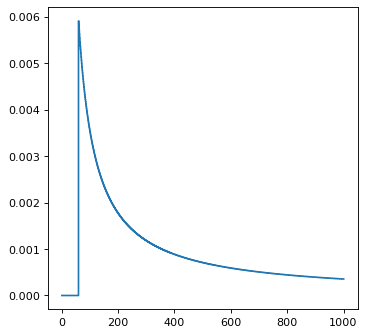

In [40]:
fig = plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(*(posterior >> toSteps));

hmmm... that's quite a heavy tail...

In [41]:
[250, 500, 1000, 2000, 4000] >> each >> (lambda N: 
    (sequence(1, N) >> uniform) 
        >> pmfMul 
        >> railroadLikehood(N, data)
        >> normalise 
        >> mean
)

[132.8721992622349,
 207.0792279834104,
 333.41989326370776,
 552.1790171646376,
 936.5079113977753]

#### 3.4 An alternative prior

In fact, the distribution of company sizes tends to follow a power law, as Robert Axtell reports in Science (see http://www.sciencemag.org/content/293/5536/1818.full.pdf)

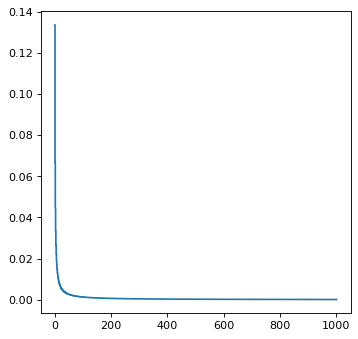

In [42]:
@coppertop
def powerLawPrior(n, alpha):
    return sequence(1, 1000) >> each >> (lambda hyp: (hyp, hyp**(-alpha))) >> to(_,adhoc) >> normalise

fig = plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(*(1000 >> powerLawPrior(_, 1) >> toSteps));

#### 3.5 Credible intervals

In [48]:
observations = [30, 60, 90]
Ns = [250, 500, 1000, 2000, 4000]

Ns >> each >> (lambda N: 
    powerLawPrior(N, 0.9)
        >> inject(observations, _, _) >> (lambda prior, ob:
            prior
                >> pmfMul 
                >> railroadLikehood(N, ob)
                >> normalise 
        )
        >> partial(lambda pmf: [pmf >> percentile(_,0.05), pmf >> mean, pmf >> percentile(_,0.95)])
)

[[91, 123.52471977274632, 199],
 [91, 132.31912378592563, 241],
 [91, 135.34103113413445, 250],
 [91, 135.34103113413445, 250],
 [91, 135.34103113413445, 250]]

In [21]:
PMF is an exponential or a struct

num**num
str**num
tag**any (not num)


PMF & keysAndTags
PMF & numsAndTags

keyAndTags = S(keys=(str**num)[map], tags=(str**str)[map])
numsAndTags = S(nums=(num**num)[list], tags=(str**str)[map])


if we wanted we could also have

PMF & keys  (i.e. (str**num)[map])
PMF & nums  (i.e. (num**num)[list])





@coppertop(style=binary)
def rvAdd(lhs:PMF[T1], rhs:PMF[T1]) -> PMF[T1]:
    return _rvOp(lhs, rhs, operator.add)


@coppertop(style=binary)
def _rvOp(lhs:PMF[keyAndTags], rhs:PMF[keyAndTags], op:(num*num)^num) -> PMF[keyAndTags]:
    ...


@coppertop(style=binary)
def _rvOp(lhs:PMF[numsAndTags], rhs:PMF[numsAndTags], op:(num*num)^num) -> PMF[numsAndTags]:
    ...




or can have PMF = _PMF[T1]



@coppertop(style=binary)
def rvAdd(lhs:PMF, rhs:PMF) -> PMF:
    return _rvOp(lhs, rhs, operator.add)


@coppertop(style=nullary)
def _rvOp(lhs:_PMF[keyAndTags], rhs:_PMF[keyAndTags], op:(num*num)^num) -> _PMF[keyAndTags]:
    ...


@coppertop(style=nullary)
def _rvOp(lhs:_PMF[numsAndTags], rhs:_PMF[numsAndTags], op:(num*num)^num) -> _PMF[numsAndTags]:
    ...



similarly for CMF and L






should either be str**num or
num**num

tag is
str**!num

bag1994 = PMF(Brown=30, Yellow=20, Red=20, Green=10, Orange=10, Tan=10)    is of type bag1994 but adhoc

bag1996 = PMF(Brown=13, Yellow=14, Red=13, Green=20, Orange=16, Blue=24)    is of type bag1996 but adhoc



the compiler can type check PMFs with keys and tags (but not with nums? because of unnecessary type explosion and it not being useful rather than is hard or impossible)


prior = PMF(hypA=0.5, hypB=0.5) >> PP    of type S(hypA=num, hypB=num) & PMF

prior.hypA
prior.hypB



likelihood = L(
    hypA=bag1994.Yellow * bag1996.Green, 
    hypB=bag1994.Green * bag1996.Yellow
) >> PP

post = prior >> pmfMul >> likelihood >> normalise
post >> PP


we need three likelihood functions?

if we select a tan L is hypA = 1, hypB=0, opposite for Blue, else above

bag1994[colour] is untypeable access - however we can type colour and the return value
bag1994.Yellow is typeable access

tuple.1 is typeable access
aTuple[1] is untypeable


mmLike(colours:N**colour, ...)
    could have a switch on colour with accessors

thus product / exponential blurs with []

so list apply is exponential accessor
. is product accessor




modelState = [adhoc(V=30, C=10, tag='J1'), adhoc(V=20, C=20, tag='J2')]


hyp1 = PMF(V=20, C=20, tag='J2')

or

hyp1 = PMF(V=20, C=20)
hyp1.tag = 'J2'

how to dispatch the dot

or

hyp1['tag'] = 'J2'

how to dispatch the item access

and reconcile to a struct()


def setAttr(PMF(T1), name, value)

def setItem(PMF(T1), name, value)


so tvstruct would dispatch
tvtuple would too except fred.1 is invalid python syntax
tup[1] = "hello"

seq and map don't have individual



so the "interface" to a struct can hide the structure details - what about

pmf.tags.fred = 1
pmf.tags = [1,2,3]

so you have two ways


pmf = S(nums, tags)   'bones' struct
or
pmf = Pmf()           python class





SyntaxError: invalid syntax (<ipython-input-21-f600090ff65d>, line 1)

In [12]:
1+1

2

In [11]:
1+1

2

IDEAL ERRORS

In [ ]:
"hello" >> toCmf

```
Can't find toCmf(str) in:
  toCmf(pmf:(adhoc + (t514 & _numEtAl & _PMF))) in dm.pmf
```

ideally

```
DispatchError: Can't find toCmf(str) in:
  toCmf(pmf:PMF+adhoc) -> any    in dm.pmf[176]
---------------------------------------------------------------------------
Traceback (most recent call last)

<ipython-input-26-8a7f9c734ab9> in <module>
----> 1 "hello" >> toCmf
```